In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime 
import os
import gc
import matplotlib
# matplotlib.use('nbagg')

import matplotlib.pyplot as plt
# plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set_style('whitegrid')
#print(os.listdir("../input"))

import time



In [2]:
#make wider graphs
sns.set(rc={'figure.figsize':(12,5)});
plt.figure(figsize=(12,5));

In [3]:
path ="mnt/ssd/kaggle-talkingdata2/competition_files/"

In [4]:

train_df = pd.read_csv(path+"train.csv", nrows=40000000)

In [5]:
train_df.head(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0
5,18787,3,1,16,379,2017-11-06 14:36:26,NaN,0
6,103022,3,1,23,379,2017-11-06 14:37:44,NaN,0
7,114221,3,1,19,379,2017-11-06 14:37:59,NaN,0
8,165970,3,1,13,379,2017-11-06 14:38:10,NaN,0
9,74544,64,1,22,459,2017-11-06 14:38:23,NaN,0


In [6]:
#set click_time and attributed_time as timeseries
train_df['click_time'] = pd.to_datetime(train_df['click_time'])
train_df['attributed_time'] = pd.to_datetime(train_df['attributed_time'])

In [7]:
train_df.head(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaT,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaT,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaT,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaT,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaT,0
5,18787,3,1,16,379,2017-11-06 14:36:26,NaT,0
6,103022,3,1,23,379,2017-11-06 14:37:44,NaT,0
7,114221,3,1,19,379,2017-11-06 14:37:59,NaT,0
8,165970,3,1,13,379,2017-11-06 14:38:10,NaT,0
9,74544,64,1,22,459,2017-11-06 14:38:23,NaT,0


In [8]:
train_df.describe()
#its ueless as all are categorical variable

,ip,app,device,os,channel,is_attributed
count,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07,4.000000e+07
mean,8.686829e+04,1.229771e+01,3.605686e+01,2.508594e+01,2.671749e+02,2.580850e-03
std,5.593250e+04,1.570868e+01,3.229184e+02,6.416385e+01,1.282211e+02,5.073647e-02
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.128500e+04,3.000000e+00,1.000000e+00,1.300000e+01,1.450000e+02,0.000000e+00
50%,8.145900e+04,1.200000e+01,1.000000e+00,1.800000e+01,2.580000e+02,0.000000e+00
75%,1.213030e+05,1.500000e+01,1.000000e+00,1.900000e+01,3.790000e+02,0.000000e+00
max,2.127740e+05,6.760000e+02,3.545000e+03,7.470000e+02,4.980000e+02,1.000000e+00


In [9]:
# we are changing astype('category') to chnage the describe result

variables = ['ip', 'app', 'device', 'os', 'channel' , 'is_attributed']
for v in variables:
    train_df[v] = train_df[v].astype('category')

In [10]:
desc_train = train_df.describe()

In [11]:
type(desc_train)

pandas.core.frame.DataFrame

In [12]:
desc_train

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,40000000.0,40000000.0,40000000.0,40000000.0,40000000.0,40000000,103234,40000000.0
unique,100771.0,485.0,1747.0,425.0,183.0,64000,49155,2.0
top,5348.0,3.0,1.0,19.0,280.0,2017-11-07 05:00:18,2017-11-07 09:36:13,0.0
freq,166635.0,7349764.0,37969642.0,9785564.0,3306788.0,1494,13,39896766.0
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 14:32:21,2017-11-06 16:00:47,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-07 09:39:40,2017-11-07 15:59:53,NaN


In [13]:
col = list( desc_train.columns )
desc_train = desc_train.append(pd.Series(col, index=col), ignore_index=True)

In [14]:
y = list ( desc_train.iloc[1] )

In [15]:
# import math
# y =list(map(lambda x: math.log(x),y))

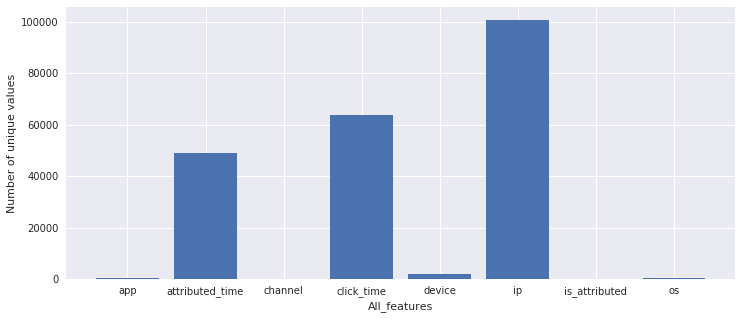

In [16]:
plt.bar(col,y)
plt.xlabel('All_features')
plt.ylabel('Number of unique values')
plt.show()

In [17]:
#double check that 'attributed_time' is not Null for all values that resulted in download (i.e. is_attributed == 1)
train_df[['attributed_time', 'is_attributed']][train_df['is_attributed']==1].describe()

,attributed_time,is_attributed
count,103234,103234.0
unique,49155,1.0
top,2017-11-07 09:36:13,1.0
freq,13,103234.0
first,2017-11-06 16:00:47,NaN
last,2017-11-07 15:59:53,NaN


In [18]:
# plot of Ip address frequency
ip_freq = train_df["ip"].value_counts()
ip_freq = ip_freq.iloc[:1000]

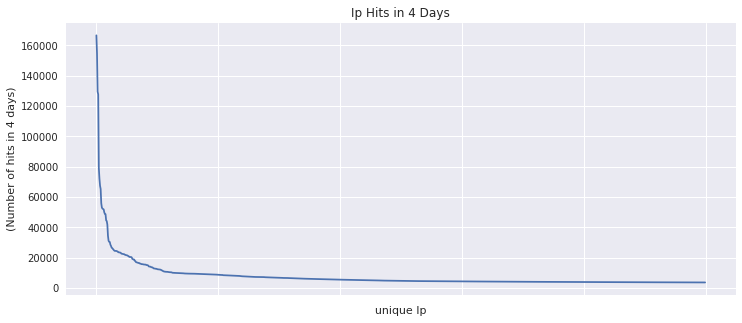

In [19]:
ip_freq.plot.line()
plt.title('Ip Hits in 4 Days')
plt.xlabel('unique Ip')
plt.ylabel('(Number of hits in 4 days)')
plt.show()

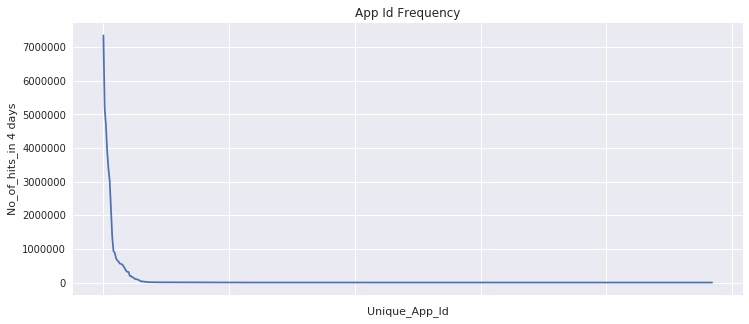

In [20]:
# plot of app Id frequency
app_freq = train_df["app"].value_counts()
app_freq.plot.line()
plt.title('App Id Frequency')
plt.xlabel('Unique_App_Id')
plt.ylabel('No_of_hits_in 4 days')
plt.show()

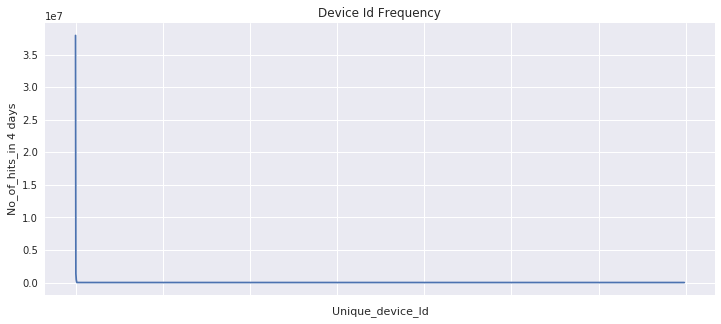

In [21]:
# plot of device Id frequency
device_freq = train_df["device"].value_counts()
device_freq.plot.line()
plt.title('Device Id Frequency')
plt.xlabel('Unique_device_Id')
plt.ylabel('No_of_hits_in 4 days')
plt.show()

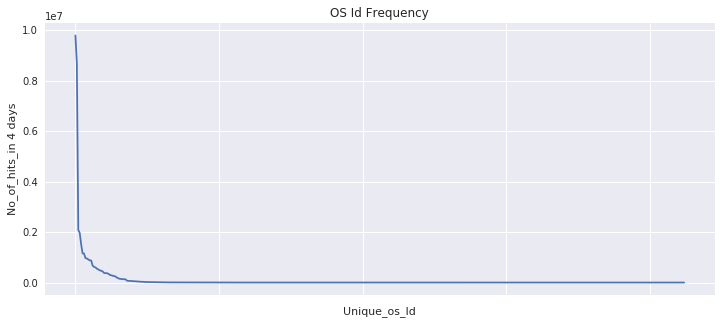

In [22]:
# plot of os Id frequency
os_freq = train_df["os"].value_counts()
os_freq.plot.line()
plt.title('OS Id Frequency')
plt.xlabel('Unique_os_Id')
plt.ylabel('No_of_hits_in 4 days')
plt.show()

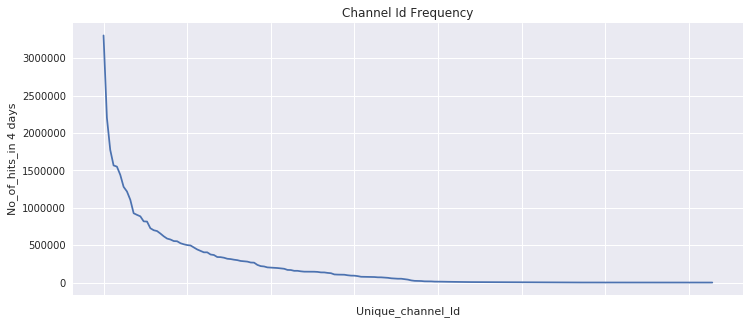

In [23]:
# plot of device Id frequency
channel_freq = train_df["channel"].value_counts()
channel_freq.plot.line()
plt.title('Channel Id Frequency')
plt.xlabel('Unique_channel_Id')
plt.ylabel('No_of_hits_in 4 days')
plt.show()

In [24]:
class_distribution = train_df["is_attributed"].value_counts()


In [25]:
class_distribution

0    39896766
1      103234
Name: is_attributed, dtype: int64

In [26]:
total = class_distribution[0] + class_distribution[1]

In [27]:
print ("Class 0 Percentage :",(class_distribution[0]/total)*100 ,'%')
print ("Class 1 Percentage :",(class_distribution[1]/total)*100 ,'%')

Class 0 Percentage : 99.741915 %
Class 1 Percentage : 0.258085 %


In [28]:
#round the time to nearest hour
train_df['click_rnd_hrs'] = train_df['click_time'].dt.round('H')  

In [29]:
train_df.head(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_rnd_hrs
0,83230,3,1,13,379,2017-11-06 14:32:21,NaT,0,2017-11-06 15:00:00
1,17357,3,1,19,379,2017-11-06 14:33:34,NaT,0,2017-11-06 15:00:00
2,35810,3,1,13,379,2017-11-06 14:34:12,NaT,0,2017-11-06 15:00:00
3,45745,14,1,13,478,2017-11-06 14:34:52,NaT,0,2017-11-06 15:00:00
4,161007,3,1,13,379,2017-11-06 14:35:08,NaT,0,2017-11-06 15:00:00
5,18787,3,1,16,379,2017-11-06 14:36:26,NaT,0,2017-11-06 15:00:00
6,103022,3,1,23,379,2017-11-06 14:37:44,NaT,0,2017-11-06 15:00:00
7,114221,3,1,19,379,2017-11-06 14:37:59,NaT,0,2017-11-06 15:00:00
8,165970,3,1,13,379,2017-11-06 14:38:10,NaT,0,2017-11-06 15:00:00
9,74544,64,1,22,459,2017-11-06 14:38:23,NaT,0,2017-11-06 15:00:00


In [30]:
train_df = pd.read_csv(path+"train.csv")
gc.collect()

15608

In [31]:
# train_df['click_rnd_hrs'].min()
 
#set click_time and attributed_time as timeseries
train_df['click_time'] = pd.to_datetime(train_df['click_time'])
train_df['attributed_time'] = pd.to_datetime(train_df['attributed_time'])


In [32]:
train_df['click_rnd_hrs'] = train_df['click_time'].dt.round('H')

In [33]:
train_df['click_rnd_hrs'].max()

Timestamp('2017-11-09 16:00:00')

In [34]:
train_df.shape

(184903890, 9)

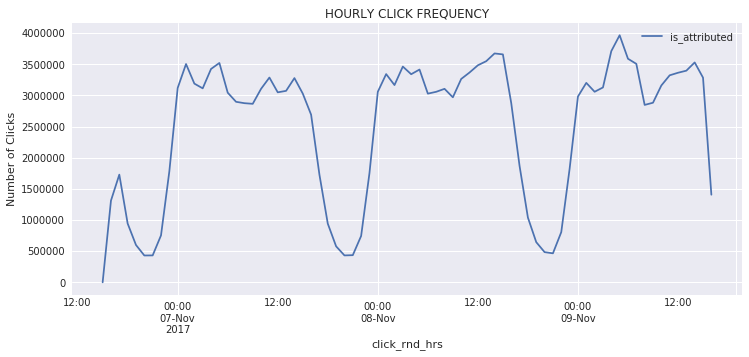

In [35]:
#check for hourly patterns
train_df[['click_rnd_hrs','is_attributed']].groupby(['click_rnd_hrs'], as_index=True).count().plot()
plt.title('HOURLY CLICK FREQUENCY');
plt.ylabel('Number of Clicks');
plt.show()

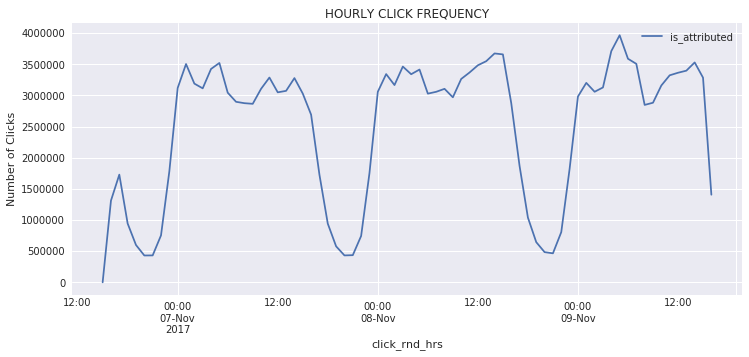

In [36]:
#check for hourly patterns of app downloaded
train_df[['click_rnd_hrs','is_attributed']].groupby(['click_rnd_hrs'], as_index=True).count().plot()
plt.title('HOURLY CLICK FREQUENCY');
plt.ylabel('Number of Clicks');
plt.show()

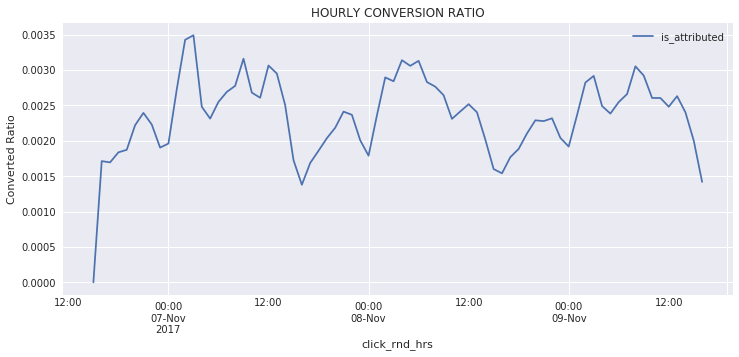

In [37]:
train_df[['click_rnd_hrs','is_attributed']].groupby(['click_rnd_hrs'], as_index=True).mean().plot()
plt.title('HOURLY CONVERSION RATIO');
plt.ylabel('Converted Ratio');

In [38]:
class_distribution = train_df["is_attributed"].value_counts()

In [39]:
total = class_distribution[0] + class_distribution[1]
print ("Class 0 Percentage :",(class_distribution[0]/total)*100 ,'%')
print ("Class 1 Percentage :",(class_distribution[1]/total)*100 ,'%')

Class 0 Percentage : 99.7529278589001 %
Class 1 Percentage : 0.24707214109989792 %


In [40]:
print ("Number of Class 0 :",(class_distribution[0]))
print ("Number of Class 1 :",(class_distribution[1]))

Number of Class 0 : 184447044
Number of Class 1 : 456846


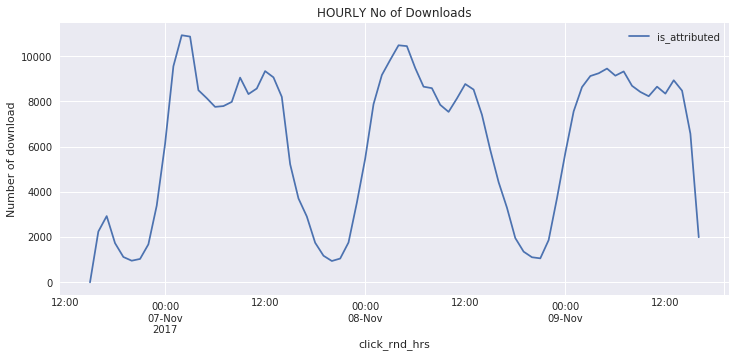

In [41]:
train_df[['click_rnd_hrs','is_attributed']].groupby(['click_rnd_hrs'], as_index=True).sum().plot()
plt.title('HOURLY No of Downloads');
plt.ylabel('Number of download');

In [42]:
import gc
gc.collect()

11165

In [43]:
#adding some more features
train_df['hour'] = pd.to_datetime(train_df.click_time).dt.hour.astype('uint8')
train_df['day'] = pd.to_datetime(train_df.click_time).dt.day.astype('uint8')
train_df['min'] = pd.to_datetime(train_df.click_time).dt.minute.astype('uint8')

In [44]:
print('grouping by ip-day-hour-min combination...')
gp = train_df[['ip','day','hour','channel']].groupby(by=['ip','day','hour'])[['channel']].count().reset_index().rename(index=str, columns={'channel': 'ip_tcount'})
# train_df = train_df.merge(gp, on=['ip','day','hour'], how='left')
# del gp
gc.collect()

grouping by ip-day-hour-min combination...


63

In [48]:
gp.head(10)

,ip,day,hour,ip_tcount
0,1,8,17,5
1,1,8,19,2
2,1,8,20,4
3,1,8,22,4
4,1,8,23,2
5,1,9,1,2
6,1,9,3,6
7,1,9,10,11
8,1,9,12,2
9,1,9,13,1
